# 1. Read th Document

In [10]:
import pandas as pd
csv_path = "PhiUSIIL_Phishing_URL_Dataset.csv"
df = pd.read_csv(csv_path)
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


# 2. Data Preprocessing
We first perform basic data quality checks (duplicates, missing values, constant columns)  
and identify numeric/categorical attributes. 

In [11]:
# check what features do we have
df.columns.tolist()
# check dupilicate rows
df.duplicated().sum()


np.int64(0)

In [12]:
# check missing value
df.isna().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [13]:
nunique = df.nunique()
const_cols = nunique[nunique <= 1].index.tolist()
nunique

FILENAME                      235795
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
L

In [14]:
# identify numeric and catergorical features
numeric_features = df.select_dtypes(include=["number"]).columns.drop("label")
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns
numeric_features, categorical_features
df["label"].value_counts(normalize=True)
df[numeric_features].describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [15]:
# four derived attributes
target_features = ["CharContinuationRate", "URLTitleMatchScore", "URLCharProb", "TLDLegitimateProb"]

df[target_features].describe()

,CharContinuationRate,URLTitleMatchScore,URLCharProb,TLDLegitimateProb
count,235795.000000,235795.000000,235795.000000,235795.000000
mean,0.845508,52.122098,0.055747,0.260423
std,0.216632,49.600564,0.010587,0.251628
min,0.000000,0.000000,0.001083,0.000000
25%,0.680000,0.000000,0.050747,0.005977
50%,1.000000,100.000000,0.057970,0.079963
75%,1.000000,100.000000,0.062875,0.522907
max,1.000000,100.000000,0.090824,0.522907


## EDA， Feature Exploration

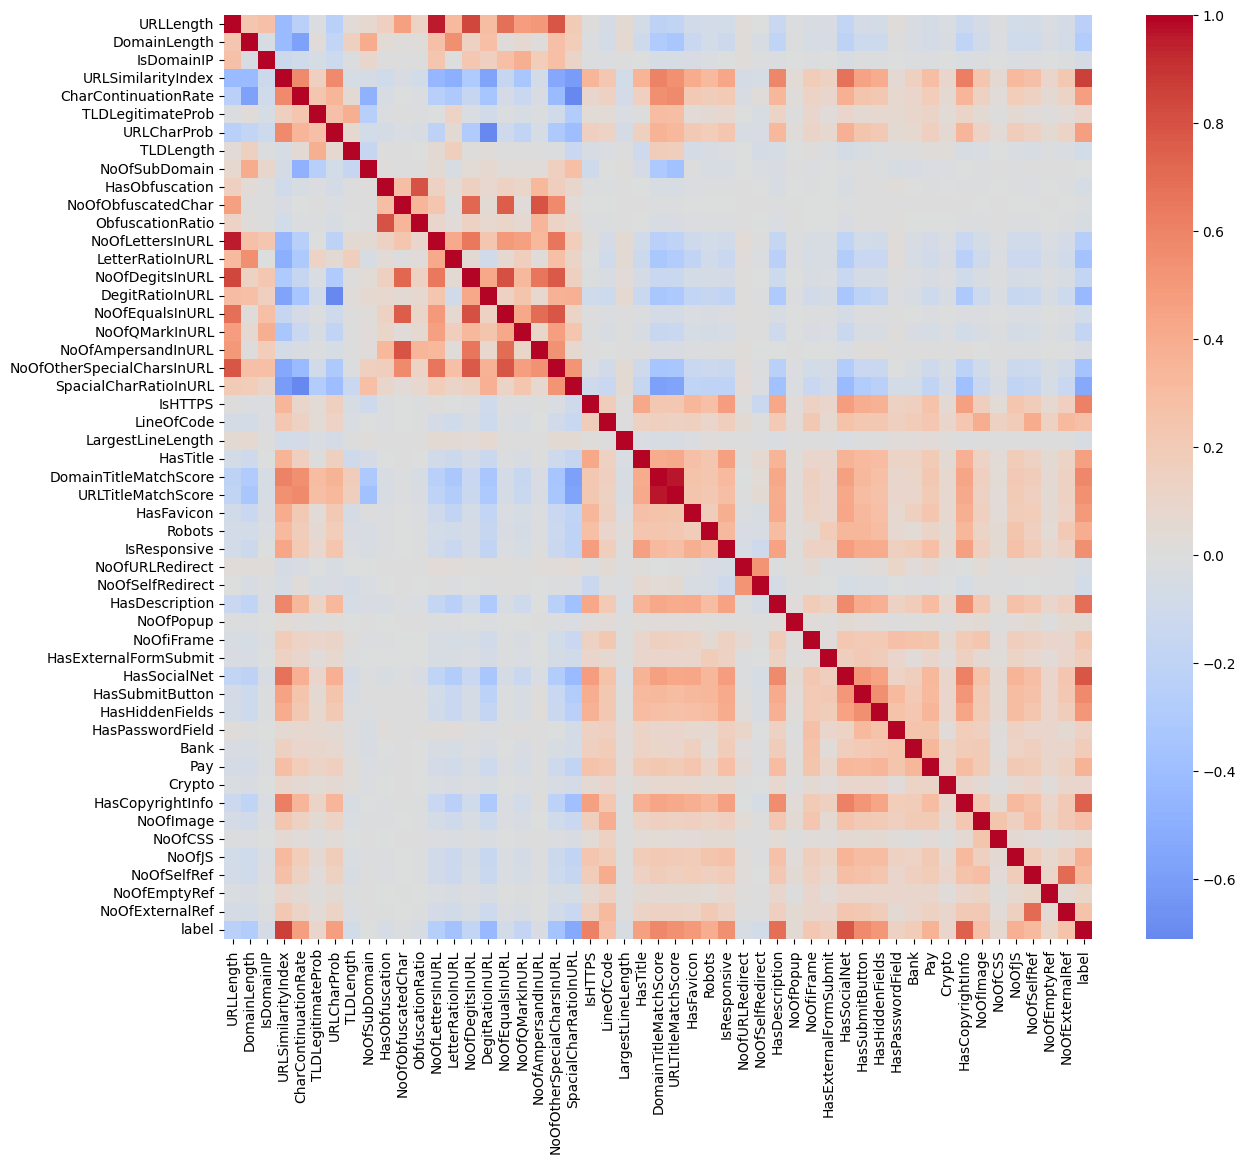

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# first check the correlation heatmap of our numeric features
plt.figure(figsize=(14, 12))
corr = df[numeric_features.tolist() + ["label"]].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

In [17]:
# We rank Pearson correlations between each numeric features with label
corr_to_label = (
    df[numeric_features.tolist() + ["label"]]
    .corr()["label"]
    .sort_values(ascending=False)
)

# show top and bottom 15 features by correlation with label
corr_to_label.head(15), corr_to_label.tail(15)

(label                    1.000000
 URLSimilarityIndex       0.860358
 HasSocialNet             0.784255
 HasCopyrightInfo         0.743358
 HasDescription           0.690232
 IsHTTPS                  0.609132
 DomainTitleMatchScore    0.584905
 HasSubmitButton          0.578561
 IsResponsive             0.548608
 URLTitleMatchScore       0.539419
 HasHiddenFields          0.507731
 HasFavicon               0.493711
 URLCharProb              0.469749
 CharContinuationRate     0.467735
 HasTitle                 0.459725
 Name: label, dtype: float64,
 NoOfURLRedirect              -0.046456
 HasObfuscation               -0.052473
 IsDomainIP                   -0.060202
 NoOfSelfRedirect             -0.076463
 NoOfEqualsInURL              -0.076963
 TLDLength                    -0.079159
 NoOfQMarkInURL               -0.175621
 NoOfDegitsInURL              -0.177980
 URLLength                    -0.233445
 NoOfLettersInURL             -0.258090
 DomainLength                 -0.283152
 NoOf

In [18]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(df[numeric_features], df["label"], random_state=42)
mi_series = pd.Series(mi_scores, index=numeric_features).sort_values(ascending=False)
mi_series.head(20)

URLSimilarityIndex            0.680530
LineOfCode                    0.600887
NoOfExternalRef               0.561239
NoOfImage                     0.543638
NoOfSelfRef                   0.527161
NoOfJS                        0.500278
LargestLineLength             0.489187
NoOfCSS                       0.447350
HasSocialNet                  0.417792
LetterRatioInURL              0.381220
HasCopyrightInfo              0.351523
HasDescription                0.306981
IsHTTPS                       0.257894
NoOfOtherSpecialCharsInURL    0.242362
DomainTitleMatchScore         0.216945
HasSubmitButton               0.209330
SpacialCharRatioInURL         0.205645
TLDLegitimateProb             0.197855
URLTitleMatchScore            0.195269
IsResponsive                  0.189570
dtype: float64

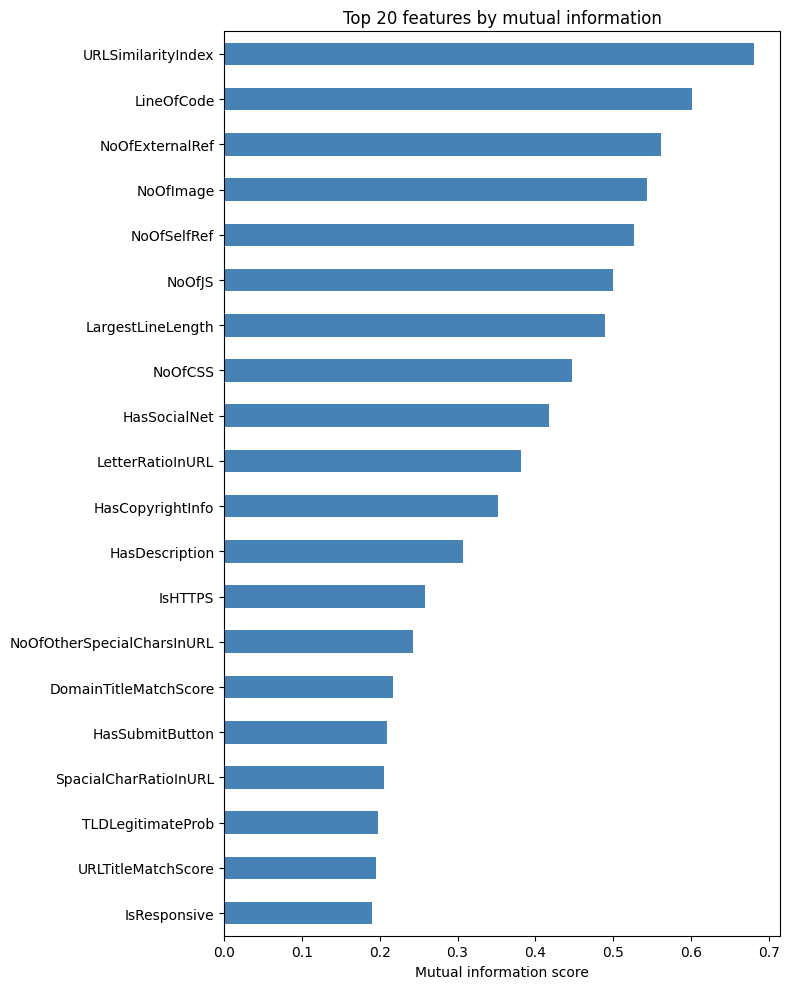

In [19]:
plt.figure(figsize=(8, 10))
mi_series.head(20).sort_values().plot.barh(color="steelblue")
plt.title("Top 20 features by mutual information")
plt.xlabel("Mutual information score")
plt.tight_layout()
plt.show()

## Drop some features
Drop high-cardinality/ID columns such as URL.
Because if we use these features, the one hot encoding will explode dimensionality.

## Prepare the features
We prepare 3 different features lists. (full, with/without target-derived features)


In [20]:
drop_cols = ["FILENAME", "URL", "Domain", "Title"]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

numeric_features = df.select_dtypes(include=["number"]).columns.drop("label")
categorical_features = df.select_dtypes(include=["object", "category", "bool"]).columns

# build four derived attributes' features set
target_features = ["CharContinuationRate", "URLTitleMatchScore", "URLCharProb", "TLDLegitimateProb"]
all_features = numeric_features.tolist() + categorical_features.tolist()
features_with_targets = [col for col in all_features if col in target_features or col not in target_features]
features_without_targets = [col for col in all_features if col not in target_features]

numeric_features, categorical_features

# save the target features in (1)b
target_features = ["CharContinuationRate", "URLTitleMatchScore", "URLCharProb", "TLDLegitimateProb"]

# We calculate the correlations between each numeric features and label
corr_to_label = (
    df[numeric_features.tolist() + ["label"]]
    .corr()["label"]
    .drop("label", errors="ignore")  # 删除 label 自身
    .sort_values(ascending=False)
)

# Set a threshold
corr_threshold = 0.4
selected_numeric_features = corr_to_label[ corr_to_label.abs() >= corr_threshold ].index.tolist()
# save the features
selected_features = selected_numeric_features + categorical_features.tolist()
selected_features_without_targets = [col for col in selected_features if col not in target_features]

In [21]:
# Inspect categorical features by unique values and top categories
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))
    print("-" * 40)

TLD: 695 unique values
TLD
com    112554
org     18793
net      7097
app      6508
uk       6395
co       5422
io       4201
de       3996
ru       3875
au       2979
Name: count, dtype: int64
----------------------------------------


# Save Data and Features

In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import json

# Create output directory for processed data and feature sets
output_dir = Path("processed_data")
output_dir.mkdir(exist_ok=True)

# Split the full preprocessed DataFrame into train and test sets (80/20)
# Stratify by the target label to keep class distribution similar
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["label"],
)

# Save the train and test datasets as separate CSV files
train_df.to_csv(output_dir / "train.csv", index=False)
test_df.to_csv(output_dir / "test.csv", index=False)

# Save the four different feature name sets into a single JSON file
# These feature sets are:
#   - all_features: all numeric and categorical features
#   - features_without_targets: all_features excluding the four derived target_features
#   - selected_features: features selected by correlation threshold + all categorical
#   - selected_features_without_targets: selected_features excluding the four derived features
feature_sets = {
    "all_features": all_features,
    "features_without_targets": features_without_targets,
    "selected_features": selected_features,
    "selected_features_without_targets": selected_features_without_targets,
    "target_features": target_features,
}

with open(output_dir / "feature_sets.json", "w", encoding="utf-8") as f:
    json.dump(feature_sets, f, ensure_ascii=False, indent=2)
